In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
data=pd.read_csv('Google_Stock_Price_Train.csv',index_col='Date',parse_dates=True)

In [3]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,663.59,"7,380,500"
2012-01-04,331.27,333.87,329.08,666.45,"5,749,400"
2012-01-05,329.83,330.75,326.89,657.21,"6,590,300"
2012-01-06,328.34,328.77,323.68,648.24,"5,405,900"
2012-01-09,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1258 non-null   float64
 1   High    1258 non-null   float64
 2   Low     1258 non-null   float64
 3   Close   1258 non-null   object 
 4   Volume  1258 non-null   object 
dtypes: float64(3), object(2)
memory usage: 59.0+ KB


<Axes: xlabel='Date'>

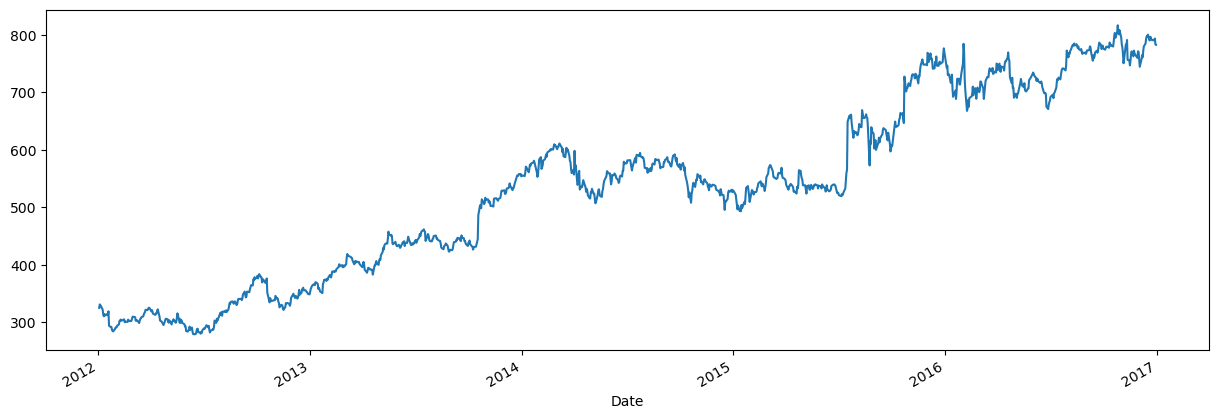

In [5]:
data['Open'].plot(figsize=(15,5))

In [6]:
data['Close']=data['Close'].str.replace(',', '').astype(float)
data['Volume']=data['Volume'].str.replace(',', '').astype(float)

In [7]:
data.rolling(7).mean().head(14)

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN
2012-01-04,NaN,NaN,NaN,NaN,NaN
2012-01-05,NaN,NaN,NaN,NaN,NaN
2012-01-06,NaN,NaN,NaN,NaN,NaN
2012-01-09,NaN,NaN,NaN,NaN,NaN
2012-01-10,NaN,NaN,NaN,NaN,NaN
2012-01-11,323.002857,325.392857,318.682857,643.132857,7.208100e+06
2012-01-12,321.457143,322.882857,316.841429,638.037143,6.691514e+06
2012-01-13,318.698571,319.801429,314.025714,631.870000,6.531857e+06


<Axes: xlabel='Date'>

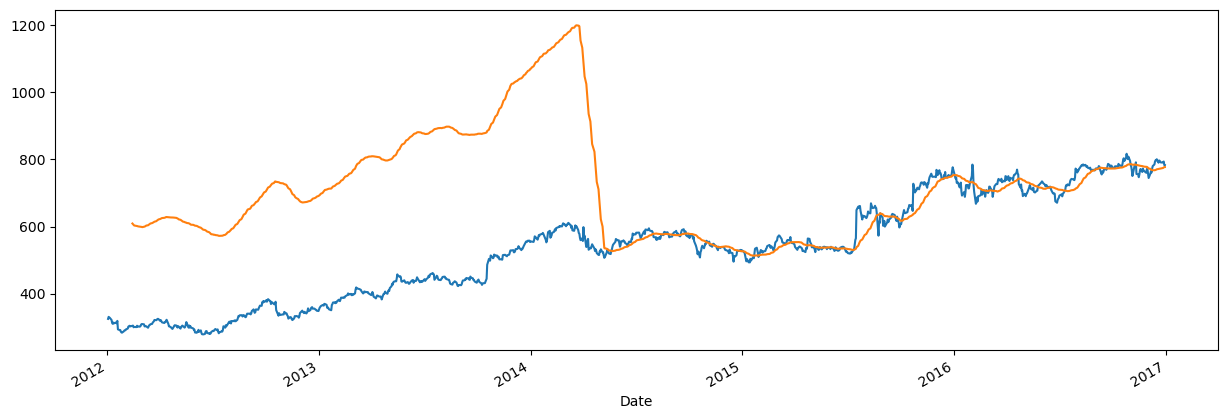

In [8]:
data['Open'].plot(figsize=(15,5))
data.rolling(window=30).mean()['Close'].plot()

<Axes: xlabel='Date'>

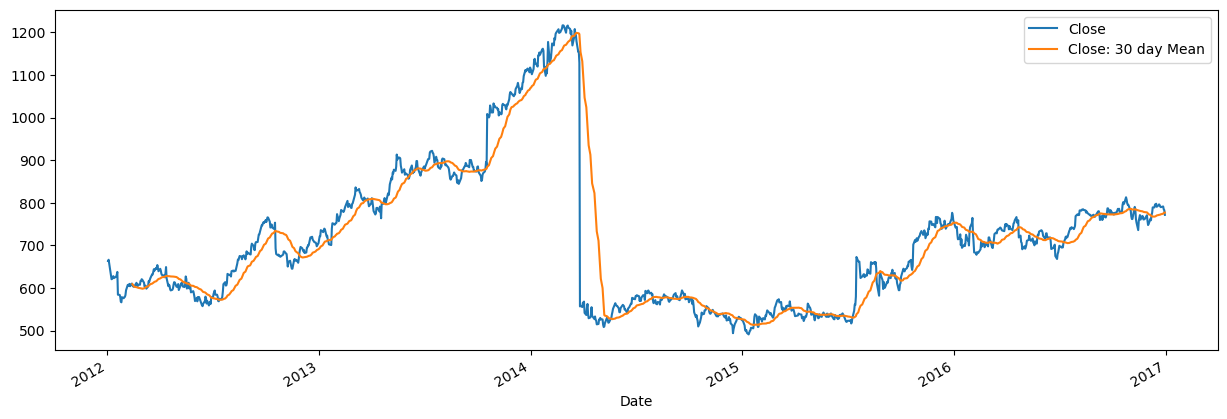

In [9]:
data['Close: 30 day Mean']=data['Close'].rolling(window=30).mean()
data[['Close','Close: 30 day Mean']].plot(figsize=(15,5))

<Axes: xlabel='Date'>

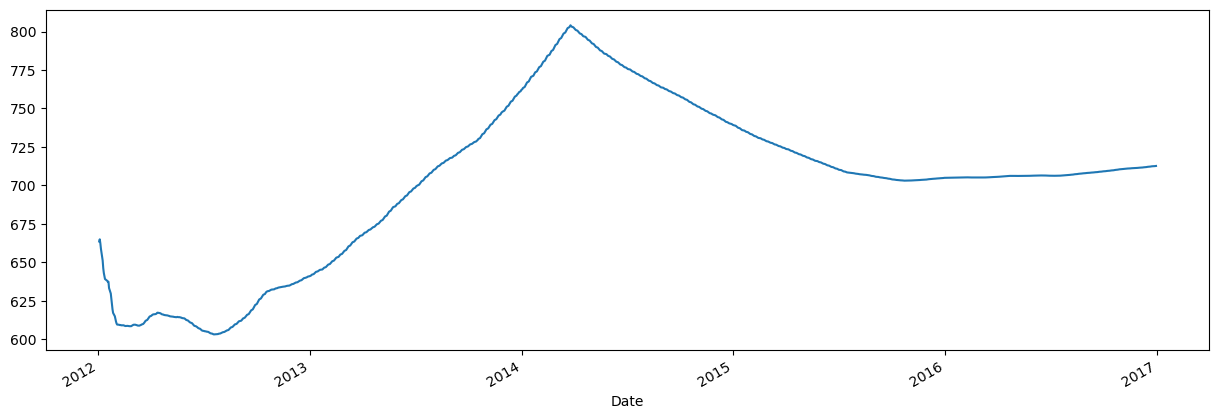

In [10]:
data['Close'].expanding(min_periods=1).mean().plot(figsize=(15,5))

In [11]:
train_set=data['Open']
train_set=pd.DataFrame(train_set)

In [12]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
train_set_scaled=sc.fit_transform(train_set)

In [13]:
X_train=[]
y_train=[]
for i in range(60,1258):
        X_train.append(train_set_scaled[i-60:i,0])
        y_train.append(train_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [14]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [15]:
regressor=Sequential()

In [16]:
#Adding LSTM layers and some Dropout regularisation
regressor.add(LSTM(units = 50,return_sequences=True,input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [17]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 [==============================] - 17s 176ms/step - loss: 0.0367
Epoch 2/100
38/38 [==============================] - 6s 169ms/step - loss: 0.0062
Epoch 3/100
38/38 [==============================] - 6s 162ms/step - loss: 0.0049
Epoch 4/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0049
Epoch 5/100
38/38 [==============================] - 6s 167ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 6s 158ms/step - loss: 0.0051
Epoch 7/100
38/38 [==============================] - 6s 168ms/step - loss: 0.0046
Epoch 8/100
38/38 [==============================] - 6s 158ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 6s 167ms/step - loss: 0.0045
Epoch 10/100
38/38 [==============================] - 6s 163ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 6s 157ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 7s 172ms/step - loss: 0.0039
Epoch 13/100

38/38 [==============================] - 9s 231ms/step - loss: 0.0016
Epoch 100/100
38/38 [==============================] - 9s 230ms/step - loss: 0.0014


In [18]:
 data_test=pd.read_csv('Google_Stock_Price_Test.csv',index_col='Date',parse_dates=True)

In [19]:
real_stock_price=data_test.iloc[:,1:2].values
data_test.head()

,Open,High,Low,Close,Volume
Date,,,,,
2017-01-03,778.81,789.63,775.80,786.14,"1,657,300"
2017-01-04,788.36,791.34,783.16,786.90,"1,073,000"
2017-01-05,786.08,794.48,785.02,794.02,"1,335,200"
2017-01-06,795.26,807.90,792.20,806.15,"1,640,200"
2017-01-09,806.40,809.97,802.83,806.65,"1,272,400"


In [20]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2017-01-03 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    20 non-null     float64
 1   High    20 non-null     float64
 2   Low     20 non-null     float64
 3   Close   20 non-null     float64
 4   Volume  20 non-null     object 
dtypes: float64(4), object(1)
memory usage: 960.0+ bytes


In [21]:
data_test['Volume']=data_test['Volume'].str.replace(',','').astype(float)

In [22]:
test_set=data_test['Open']
test_set=pd.DataFrame(test_set)

In [23]:
data_total=pd.concat((data['Open'],data_test['Open']),axis=0)
inputs=data_total[len(data_total)-len(data_test)-60:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,80):
    X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
prediction=regressor.predict(X_test)
prediction=sc.inverse_transform(prediction)

C:\Users\Yashu Kudiya\anaconda3\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 4s 4s/step


In [24]:
prediction=pd.DataFrame(prediction)
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20 non-null     float32
dtypes: float32(1)
memory usage: 208.0 bytes


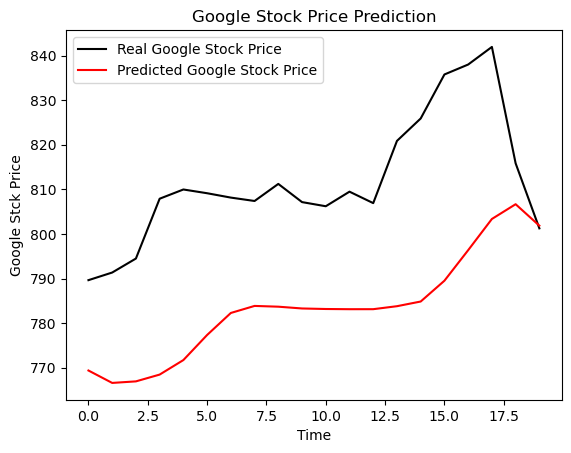

In [26]:
plt.plot(real_stock_price,color='black',label='Real Google Stock Price')
plt.plot(prediction,color='red',label='Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stck Price')
plt.legend()
plt.show()